<a href="https://www.kaggle.com/code/alamukiiraakha/eda-and-linear-regression-for-advertising-data?scriptVersionId=141573697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


#  EDA on Advertising Data

In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
data.shape

(200, 4)

In [5]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [10]:
data.isnull().sum() # to check for null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
data.duplicated().any() # to check for dulpicated values

False

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


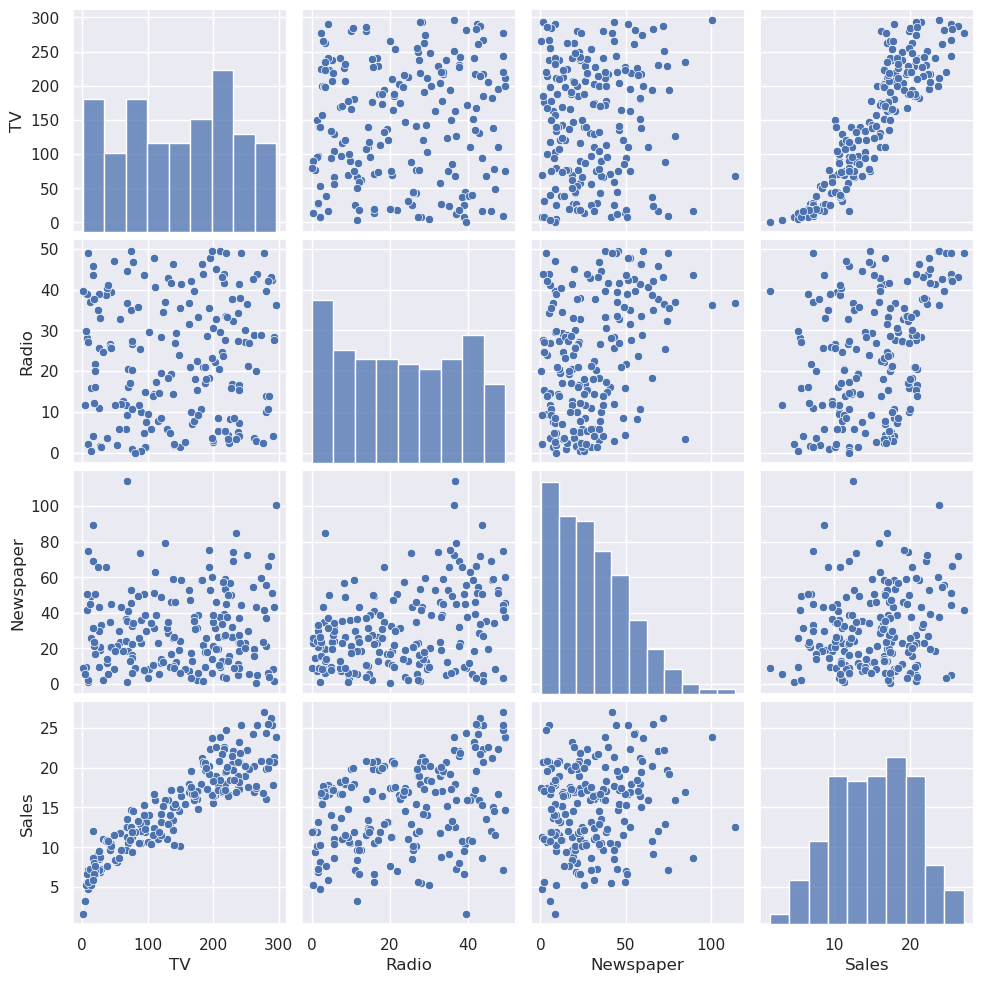

In [12]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(data)

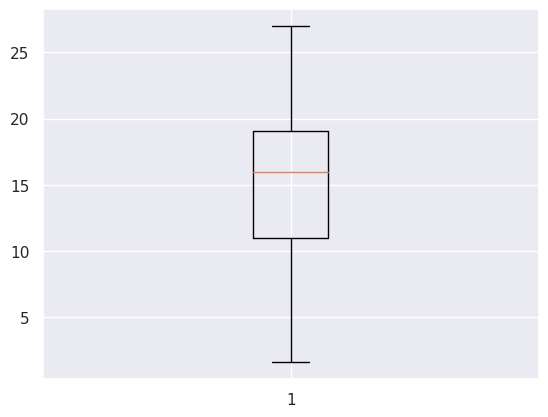

In [13]:
import matplotlib.pyplot as plt 
plt.boxplot(data['Sales'])
plt.show()

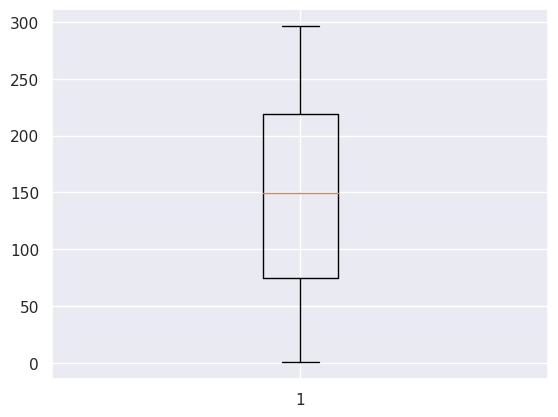

In [14]:
import matplotlib.pyplot as plt 
plt.boxplot(data['TV'])
plt.show()

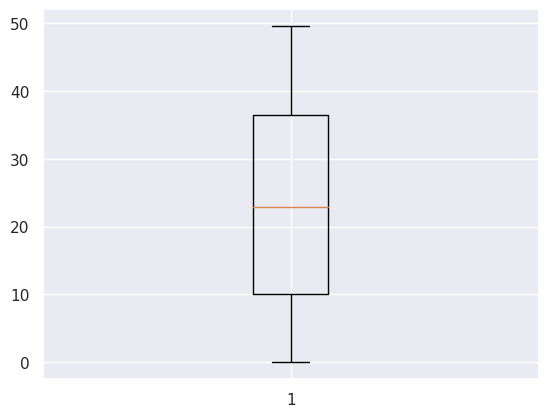

In [15]:
import matplotlib.pyplot as plt 
plt.boxplot(data['Radio'])
plt.show()

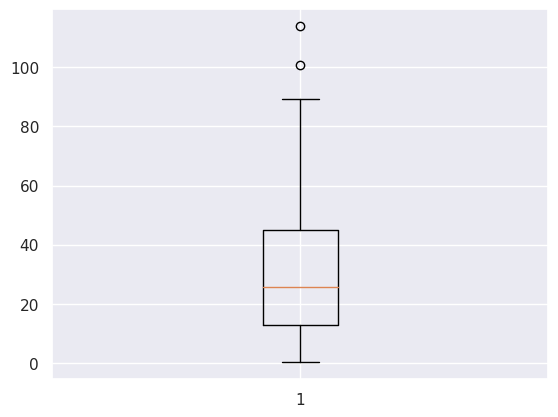

In [16]:
import matplotlib.pyplot as plt 
plt.boxplot(data['Newspaper'])
plt.show()

In [17]:
data.corr()  # to create a correlation matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

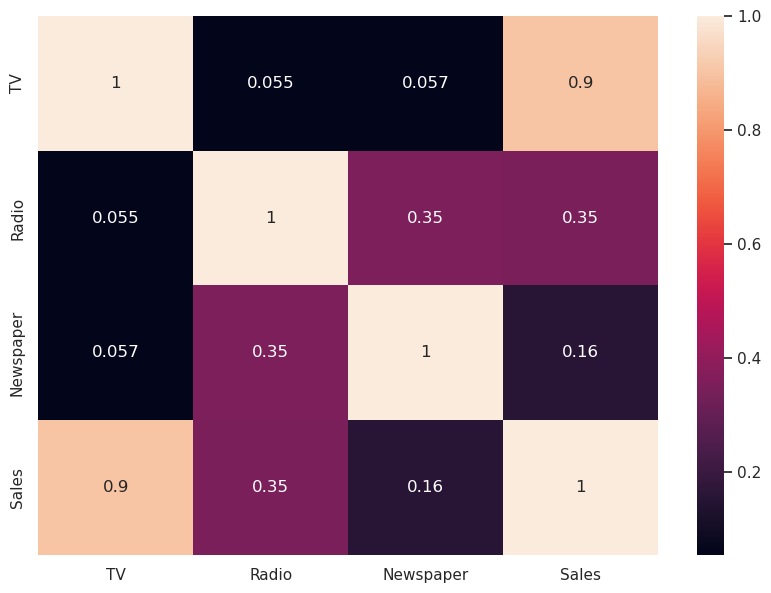

In [18]:
plt.figure(figsize=(10,7)) # to create a correlation heatmap
sns.heatmap(data.corr(), annot =True)

#  Multivariate Linear Regression on Advertising Data 

In [19]:
x = data[['TV', 'Newspaper', 'Radio']]
y = data['Sales']


In [20]:
from sklearn.linear_model import LinearRegression # importing the model

In [21]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9025912899684558

In [22]:
from sklearn.model_selection import train_test_split # to split data into train set and test set 

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state = 1)

In [24]:
x_train.size

402

In [25]:
x_test.size

198

In [26]:
model.fit(x_train,y_train) 
model.intercept_.round(3) # to chech estimated intercept from model 

4.75

In [27]:
model.coef_.round(3) # to check the coefficients of the features

array([ 0.055, -0.003,  0.106])

In [28]:
ytest_pred = model.predict(x_test)
ytest_pred.size


66

In [29]:
x_test.size

198

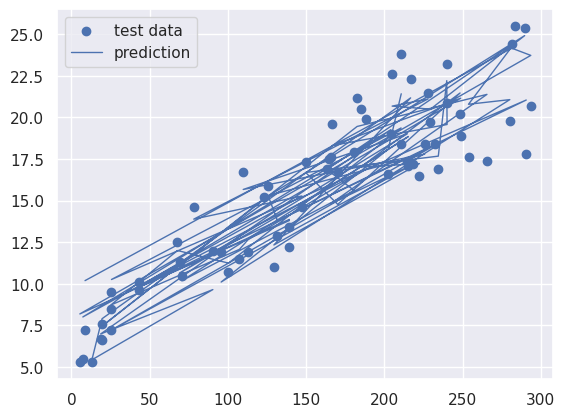

In [30]:
plt.scatter(x_test['TV'],y_test, label ='test data');
plt.plot(x_test['TV'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()


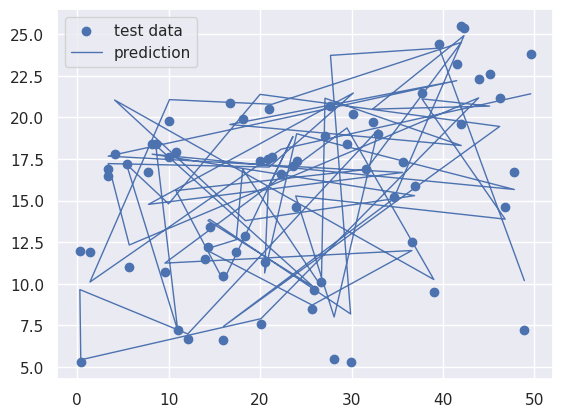

In [31]:
plt.scatter(x_test['Radio'],y_test, label ='test data');
plt.plot(x_test['Radio'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

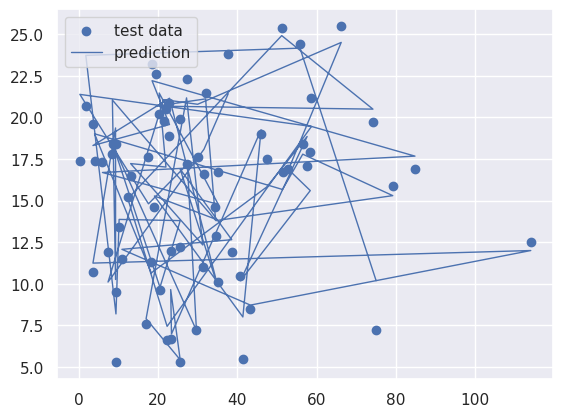

In [32]:
plt.scatter(x_test['Newspaper'],y_test, label ='test data');
plt.plot(x_test['Newspaper'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

In [33]:
residuals = y_test - ytest_pred
residuals.head()

58     2.374958
40    -1.491815
34     1.792626
102   -1.274508
184   -3.194635
Name: Sales, dtype: float64

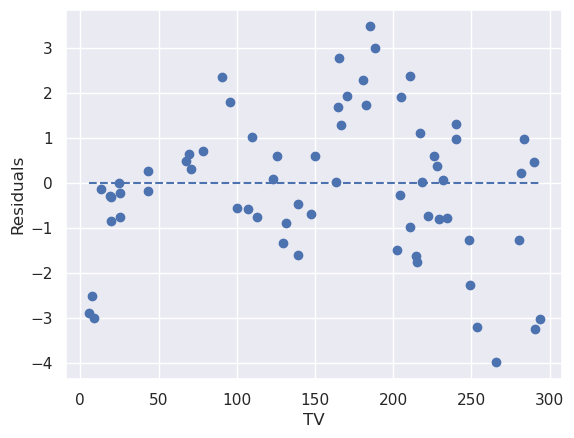

In [34]:
plt.scatter(x_test['TV'], residuals)
plt.hlines(y=0, xmin= x_test['TV'].min(), xmax= x_test['TV'].max(), linestyle ='--')

plt.xlabel('TV')
plt.ylabel('Residuals')
plt.show()

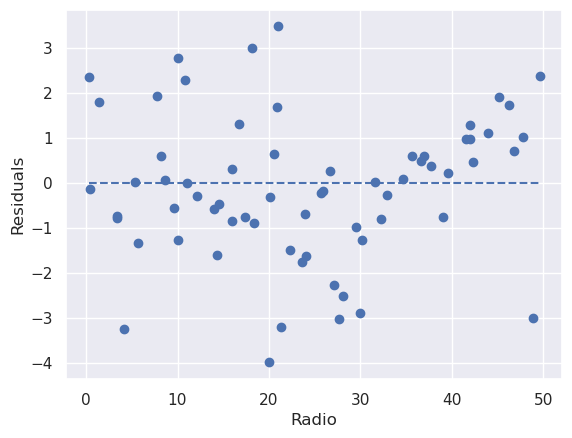

In [35]:
plt.scatter(x_test['Radio'], residuals)
plt.hlines(y=0, xmin= x_test['Radio'].min(), xmax= x_test['Radio'].max(), linestyle ='--')

plt.xlabel('Radio')
plt.ylabel('Residuals')
plt.show()

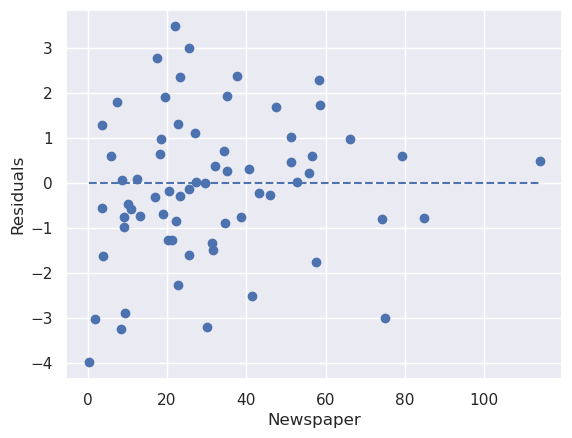

In [36]:
plt.scatter(x_test['Newspaper'], residuals)
plt.hlines(y=0, xmin= x_test['Newspaper'].min(), xmax= x_test['Newspaper'].max(), linestyle ='--')

plt.xlabel('Newspaper')
plt.ylabel('Residuals')
plt.show()

In [37]:
residuals.mean() # to get the average of all residuals

-0.10689583385314622

In [38]:
(residuals**2).mean() # to get the mean squared error or 

2.5676842539920304

In [39]:
from sklearn.metrics import mean_squared_error # use this method 
mean_squared_error (y_test,ytest_pred)

2.5676842539920304

/tmp/ipykernel_20/103371855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-ytest_pred)) # to check if errors are normally distributed


<Axes: xlabel='Sales', ylabel='Density'>

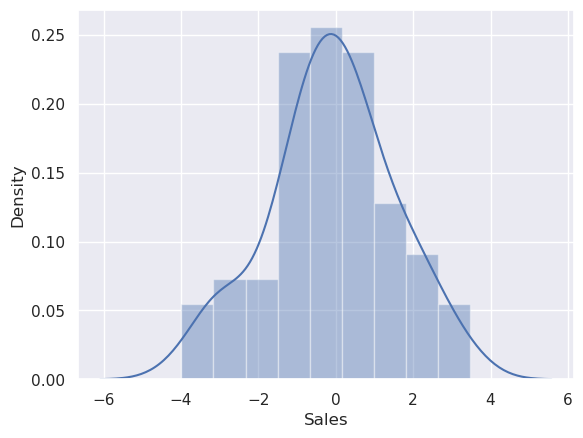

In [40]:
sns.distplot((y_test-ytest_pred)) # to check if errors are normally distributed

# Kindly upvote if you like it and recommend me for jobs 

**Thank you**